In [5]:
from sympyhelpers.sympyhelpers import *
from sympy import *
sympy.init_printing(order='grevlex')

In [6]:
m,g = symbols('m g',real=True)
th,thd,thdd = symbols('theta thetadot thetaddot',real=True)
b,bd,bdd = symbols('beta betadot betaddot',real=True)
k,l,l0 = symbols('k l l_0',real=True)
r,rd,rdd = symbols('r rdot rddot',real=True)
t = symbols('t',real=True)
rho = symbols('rho',real=True)

diffmap = {th:thd,thd:thdd,b:bd,bd:bdd,r:rd,rd:rdd}

In [7]:
iWb = Matrix([0,0,thd])
r_PO = Matrix([r,0,0])
v_PO = transportEq(r_PO,t,diffmap,iWb)
a_PO = transportEq(v_PO,t,diffmap,iWb)

iCb = rotMat(3,-th)
cCb = rotMat(3,-b)

In [8]:
forces = -k*(r-l0)*Matrix([1,0,0])-k*(rho-l0)*Transpose(cCb)*Matrix([1,0,0])+m*g*Transpose(iCb)*Matrix([1,0,0])

In [9]:
forces

⎡-k⋅(-l₀ + ρ)⋅cos(β) + g⋅m⋅cos(θ) - k⋅(-l₀ + r)⎤
⎢                                              ⎥
⎢       k⋅(-l₀ + ρ)⋅sin(β) - g⋅m⋅sin(θ)        ⎥
⎢                                              ⎥
⎣                      0                       ⎦

In [10]:
eom = m*a_PO - forces

In [11]:
sols = solve(eom,[rdd,thdd])

In [12]:
sols

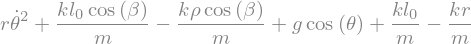

In [8]:
expand(simplify(sols[rdd]))

In [9]:
t1 = collect(expand(simplify(sols[thdd])),k/(m*r))

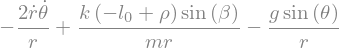

In [10]:
collect(t1,sin(b))